In [4]:
import pandas as pd
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt 

In [9]:
ufo_data_df = pd.read_csv("Data/scrubbed.csv")
ufo_data_df.head()

C:\Users\mwies\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [12]:
ufo_usa = ufo_data_df[ufo_data_df.country.eq("us")]
ufo_usa.head()


                 

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333


In [13]:
ufo_usa[['Month', 'Day', 'Time']]= ufo_usa['datetime'].str.split('/',expand=True)


ufo_usa['Year']= ufo_usa['Time'].str[0:4]
ufo_usa['Time']= ufo_usa['Time'].str[5:10]
ufo_usa.head()

C:\Users\mwies\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\mwies\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\mwies\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,10,10,20:30,1949
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,10,10,21:00,1956
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,10,10,20:00,1960
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889,10,10,19:00,1961
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333,10,10,23:45,1965


In [14]:


ufo_dates = ufo_usa[ufo_usa['Year'].between('1993', '2020')]
ufo_dates.head()


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
56,10/10/1993 22:00,peoria,il,us,light,8,8 seconds,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.6936111,-89.588889,10,10,22:00,1993
57,10/10/1993 23:00,carthage,tn,us,other,60,less than 1 min,1 object with green and red lights,3/21/2003,36.2522222,-85.951667,10,10,23:00,1993
59,10/10/1994 18:30,burnt hills,ny,us,rectangle,120,2 minutes,Giant rectangular craft (resembling an upside-...,10/23/2013,42.9097222,-73.895556,10,10,18:30,1994
60,10/10/1994 22:00,pinebergen,ar,us,light,5,5 seconds,Round&#44 bright&#44 low flying object silentl...,2/18/2001,34.1027778,-91.992222,10,10,22:00,1994
62,10/10/1995 19:45,milwaukee,wi,us,NaN,120,2 min.,Man on Hwy 43 SW of Milwaukee sees large&#44 ...,11/2/1999,43.0388889,-87.906389,10,10,19:45,1995


In [20]:
ufo_dates['shape'].replace('', np.nan, inplace=True)

In [21]:
ufo_dates.count()

datetime                59592
city                    59592
state                   59592
country                 59592
shape                   58131
duration (seconds)      59592
duration (hours/min)    59592
comments                59581
date posted             59592
latitude                59592
longitude               59592
Month                   59592
Day                     59592
Time                    59592
Year                    59592
dtype: int64

In [22]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", 
      ufo_dates.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 datetime                   0
city                       0
state                      0
country                    0
shape                   1461
duration (seconds)         0
duration (hours/min)       0
comments                  11
date posted                0
latitude                   0
longitude                  0
Month                      0
Day                        0
Time                       0
Year                       0
dtype: int64


In [23]:
ufo_dates.dropna(subset=['shape'], inplace=True)
ufo_dates.count()

C:\Users\mwies\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


datetime                58131
city                    58131
state                   58131
country                 58131
shape                   58131
duration (seconds)      58131
duration (hours/min)    58131
comments                58125
date posted             58131
latitude                58131
longitude               58131
Month                   58131
Day                     58131
Time                    58131
Year                    58131
dtype: int64

In [24]:
ufo_dates.to_csv(r'/Users/mwies/Desktop/github-repo/alien-anaylsis/project-1-alien-analysis\cleaned_ufo_data.csv', index = False)

In [26]:
cleaned_ufo_data = pd.read_csv("cleaned_ufo_data.csv")
cleaned_ufo_data.head(30)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
0,10/10/1993 22:00,peoria,il,us,light,8.0,8 seconds,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.693611,-89.588889,10,10,22:00,1993
1,10/10/1993 23:00,carthage,tn,us,other,60.0,less than 1 min,1 object with green and red lights,3/21/2003,36.252222,-85.951667,10,10,23:00,1993
2,10/10/1994 18:30,burnt hills,ny,us,rectangle,120.0,2 minutes,Giant rectangular craft (resembling an upside-...,10/23/2013,42.909722,-73.895556,10,10,18:30,1994
3,10/10/1994 22:00,pinebergen,ar,us,light,5.0,5 seconds,Round&#44 bright&#44 low flying object silentl...,2/18/2001,34.102778,-91.992222,10,10,22:00,1994
4,10/10/1996 03:20,higginsville,mo,us,triangle,3.0,3sec,illuminated triangular craft&#44 flying at hig...,2/16/2000,39.072500,-93.716944,10,10,03:20,1996
5,10/10/1996 22:00,charleston,sc,us,light,300.0,5 min,Flashing object above Charleston&#44 SC,11/26/2003,32.776389,-79.931111,10,10,22:00,1996
6,10/10/1996 22:30,monroe county,oh,us,cylinder,60.0,1 minute,Looked like it went through the hillside,7/8/2004,39.440278,-84.362222,10,10,22:30,1996
7,10/10/1997 16:00,connersville,in,us,delta,14400.0,4 hours,3 differants types &#44 cluster &#44delta &#44...,1/28/1999,39.641111,-85.141111,10,10,16:00,1997
8,10/10/1997 17:00,mesa,az,us,sphere,30.0,30 seconds,A small dark purple quad-thruster craft hoveri...,2/14/2008,33.422222,-111.821944,10,10,17:00,1997
9,10/10/1997 20:00,bonaire,ga,us,triangle,300.0,<5 minutes,Triangular Object Sighted at Very Close Range,2/1/2007,32.543611,-83.596111,10,10,20:00,1997


In [51]:
shape_df = cleaned_ufo_data['shape'].value_counts().rename_axis('UFO Shape').reset_index(name="Counts")

shape_df

,UFO Shape,Counts
0,light,12837
1,triangle,6027
2,circle,5638
3,fireball,4996
4,unknown,4204
5,other,4027
6,sphere,3976
7,disk,2963
8,oval,2668
9,formation,1891


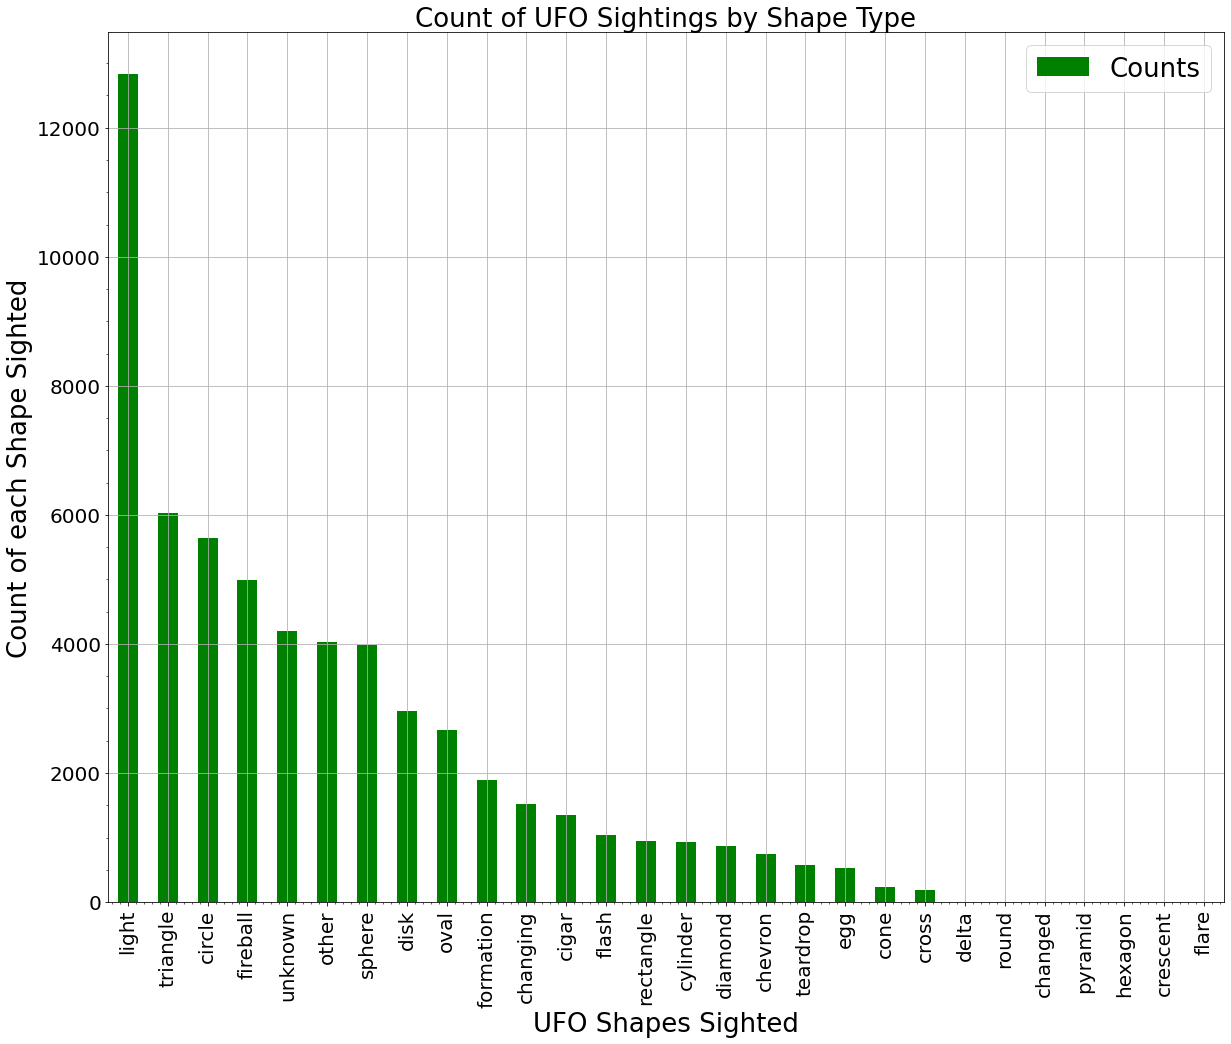

In [199]:
shape_df.plot(kind='bar', color='g', figsize=(20,16), fontsize=20)

plt.xlabel("UFO Shapes Sighted", fontsize=26)
plt.ylabel("Count of each Shape Sighted", fontsize=26)
plt.title("Count of UFO Sightings by Shape Type", fontsize=26)

plt.minorticks_on()
plt.grid()
plt.legend(fontsize=26)
x_indexes = np.arange(len(shape_df))
plt.xticks(ticks=x_indexes, labels=shape_df["UFO Shape"])
plt.savefig("Count of UFO Sigthings by Shape Type2.png")
plt.show()


In [91]:
shape_year = cleaned_ufo_data.groupby(['Year','shape']).size().reset_index().groupby('Year')[[0]].nunique()
#shape_year2 = shape_year.set_axis(["Year","Count of Unique Shapes"], axis=1, inplace=False)

shape_year.rename({'Year': 'Year', "0": 'Count of Unique Shapes'}, axis=1, inplace=True)
shape_year

,0
Year,
1993,14
1994,14
1995,17
1996,18
1997,19
1998,21
1999,21
2000,19
2001,21


In [138]:
#year_df = cleaned_ufo_data.groupby(['Year', 'shape']))

#year_df = cleaned_ufo_data.set_index('Year', inplace=True)

Index_data_df = pd.read_csv("cleaned_ufo_data.csv")
Index_data_df.head()



,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
0,10/10/1993 22:00,peoria,il,us,light,8.0,8 seconds,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.693611,-89.588889,10,10,22:00,1993
1,10/10/1993 23:00,carthage,tn,us,other,60.0,less than 1 min,1 object with green and red lights,3/21/2003,36.252222,-85.951667,10,10,23:00,1993
2,10/10/1994 18:30,burnt hills,ny,us,rectangle,120.0,2 minutes,Giant rectangular craft (resembling an upside-...,10/23/2013,42.909722,-73.895556,10,10,18:30,1994
3,10/10/1994 22:00,pinebergen,ar,us,light,5.0,5 seconds,Round&#44 bright&#44 low flying object silentl...,2/18/2001,34.102778,-91.992222,10,10,22:00,1994
4,10/10/1996 03:20,higginsville,mo,us,triangle,3.0,3sec,illuminated triangular craft&#44 flying at hig...,2/16/2000,39.072500,-93.716944,10,10,03:20,1996


In [139]:
Index_data_df.set_index('shape', inplace=True)
Index_data_df.head()

,datetime,city,state,country,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
shape,,,,,,,,,,,,,,
light,10/10/1993 22:00,peoria,il,us,8.0,8 seconds,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.693611,-89.588889,10,10,22:00,1993
other,10/10/1993 23:00,carthage,tn,us,60.0,less than 1 min,1 object with green and red lights,3/21/2003,36.252222,-85.951667,10,10,23:00,1993
rectangle,10/10/1994 18:30,burnt hills,ny,us,120.0,2 minutes,Giant rectangular craft (resembling an upside-...,10/23/2013,42.909722,-73.895556,10,10,18:30,1994
light,10/10/1994 22:00,pinebergen,ar,us,5.0,5 seconds,Round&#44 bright&#44 low flying object silentl...,2/18/2001,34.102778,-91.992222,10,10,22:00,1994
triangle,10/10/1996 03:20,higginsville,mo,us,3.0,3sec,illuminated triangular craft&#44 flying at hig...,2/16/2000,39.072500,-93.716944,10,10,03:20,1996


In [143]:
year_light_df = Index_data_df.loc['light']

year_light_df

,datetime,city,state,country,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
shape,,,,,,,,,,,,,,
light,10/10/1993 22:00,peoria,il,us,8.0,8 seconds,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.693611,-89.588889,10,10,22:00,1993
light,10/10/1994 22:00,pinebergen,ar,us,5.0,5 seconds,Round&#44 bright&#44 low flying object silentl...,2/18/2001,34.102778,-91.992222,10,10,22:00,1994
light,10/10/1996 22:00,charleston,sc,us,300.0,5 min,Flashing object above Charleston&#44 SC,11/26/2003,32.776389,-79.931111,10,10,22:00,1996
light,10/10/1998 20:50,mooresville,nc,us,2.0,2 seconds,Star gazing in back yard with telescope and bi...,11/1/1998,35.584722,-80.810278,10,10,20:50,1998
light,10/10/1999 21:00,rachel,nv,us,10800.0,3 hours,Bright lights with incredible agility seen fro...,5/24/2005,37.644722,-115.742778,10,10,21:00,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
light,9/9/2012 20:30,mt. juliet,tn,us,120.0,2 minutes,Bright white light moving slowly across sky wi...,9/24/2012,36.200000,-86.518611,9,9,20:30,2012
light,9/9/2012 21:00,new york city (brooklyn),ny,us,1290.0,21:30,Glowing&#44 circular lights visible in the clo...,9/24/2012,40.714167,-74.006389,9,9,21:00,2012
light,9/9/2012 23:00,gainesville,ga,us,5.0,5 seconds,Ball of light,9/24/2012,34.297778,-83.824167,9,9,23:00,2012


In [163]:
year_count_light = year_light_df['Year'].value_counts().rename_axis('Year').reset_index(name="Counts")

year_count_light = year_count_light.sort_values('Year')

year_count_light


,Year,Counts
21,1993,30
20,1994,44
19,1995,72
18,1996,86
17,1997,222
16,1998,264
15,1999,431
13,2000,459
11,2001,539
12,2002,506


In [145]:
year_triangle_df = Index_data_df.loc['triangle']

year_triangle_df

,datetime,city,state,country,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
shape,,,,,,,,,,,,,,
triangle,10/10/1996 03:20,higginsville,mo,us,3.0,3sec,illuminated triangular craft&#44 flying at hig...,2/16/2000,39.072500,-93.716944,10,10,03:20,1996
triangle,10/10/1997 20:00,bonaire,ga,us,300.0,<5 minutes,Triangular Object Sighted at Very Close Range,2/1/2007,32.543611,-83.596111,10,10,20:00,1997
triangle,10/10/1998 20:30,spokane (about 30 miles sw of&#44i-90&#44 mayb...,wa,us,600.0,10 minutes,Dark boomerange object seen for ten minutes ho...,8/5/2001,47.658889,-117.425000,10,10,20:30,1998
triangle,10/10/2001 03:00,rockwell city,ia,us,240.0,4 min.s,Large&#44silent&#44slow&#44low to the ground d...,7/1/2002,42.395278,-94.633611,10,10,03:00,2001
triangle,10/10/2001 22:00,phoenix,az,us,60.0,less then a minute,Triangle shaped craft spotted flying west to e...,11/20/2001,33.448333,-112.073333,10,10,22:00,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
triangle,9/9/2009 21:40,boyne city,mi,us,360.0,6 min.,candy cane shape across sky followed by trian...,12/12/2009,45.216667,-85.013889,9,9,21:40,2009
triangle,9/9/2012 04:43,murfreesboro,tn,us,7200.0,2 hours,Triangular shape white light with red and gree...,9/24/2012,35.845556,-86.390278,9,9,04:43,2012
triangle,9/9/2012 05:35,malden,ma,us,60.0,1 minute,Triangular in shape. Moving forward and flying...,9/24/2012,42.425000,-71.066667,9,9,05:35,2012


In [164]:
year_count_triangle = year_triangle_df['Year'].value_counts().rename_axis('Year').reset_index(name="Counts")

year_count_triangle = year_count_triangle.sort_values('Year')

year_count_triangle

,Year,Counts
21,1993,49
20,1994,62
19,1995,71
18,1996,79
16,1997,164
17,1998,156
14,1999,231
13,2000,244
11,2001,273
12,2002,264


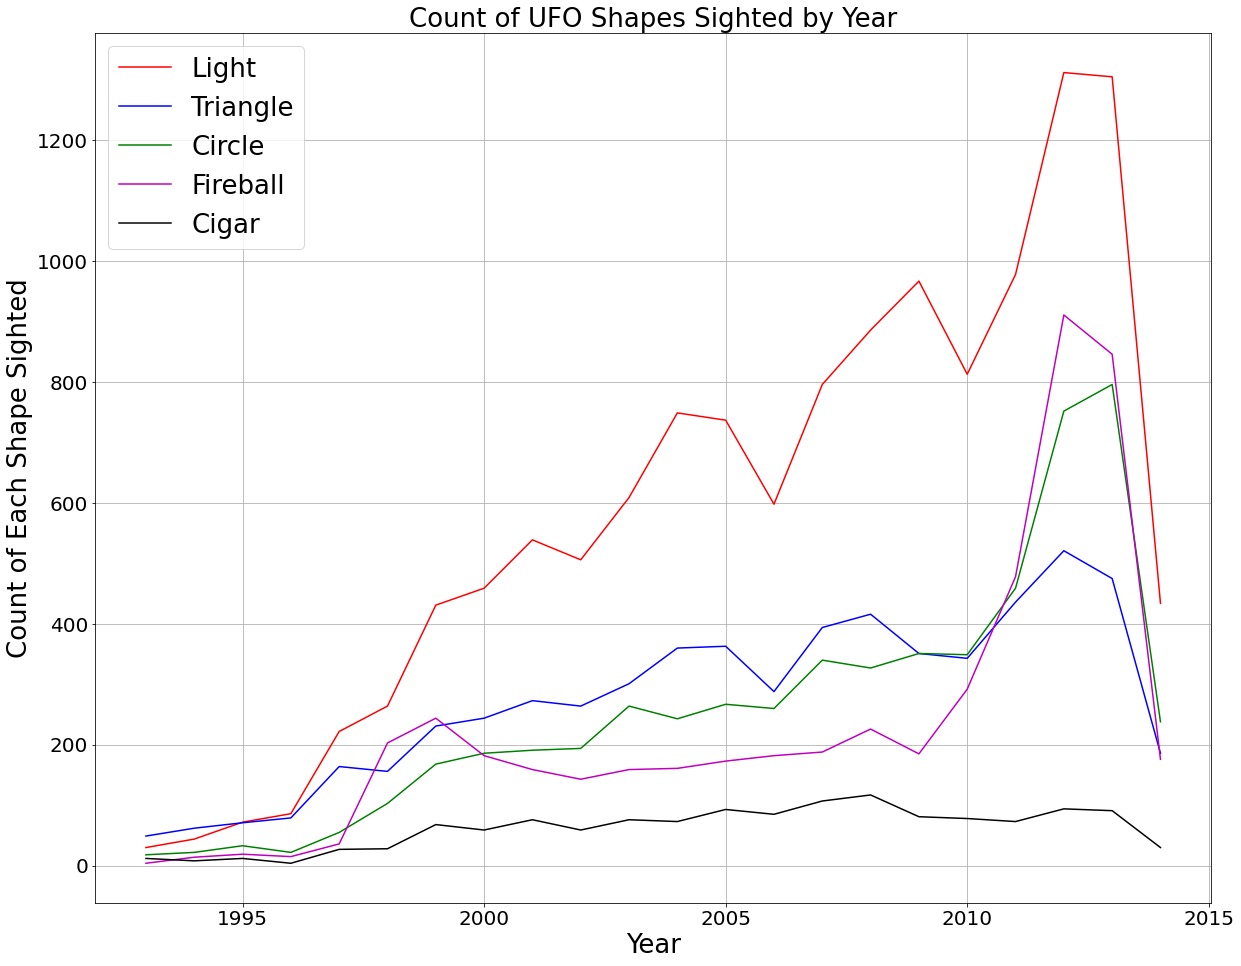

In [198]:
years = year_count_triangle['Year']
plt.plot(years, year_count_light['Counts'], color='r', label="Light")
plt.plot(years, year_count_triangle['Counts'], color='b', label="Triangle")
plt.plot(years, year_count_circle['Counts'], color='g', label="Circle")
plt.plot(years, year_count_fireball['Counts'], color='m', label="Fireball")
plt.plot(years, year_count_cigar['Counts'], color='k', label="Cigar")

#plt.rcParams.update({'font.size': 20})

plt.xlabel("Year", fontsize=26)
plt.ylabel("Count of Each Shape Sighted", fontsize=26)
plt.title("Count of UFO Shapes Sighted by Year", fontsize=26)


plt.grid()
plt.legend(fontsize=26)
plt.tight_layout

plt.savefig("Count of UFO Shapes Sighted by Year.png")
plt.show()

In [192]:
year_circle_df = Index_data_df.loc['circle']

year_count_circle = year_circle_df['Year'].value_counts().rename_axis('Year').reset_index(name="Counts")

year_count_circle = year_count_circle.sort_values('Year')

year_count_circle


,Year,Counts
21,1993,18
19,1994,22
18,1995,33
20,1996,22
17,1997,55
16,1998,103
15,1999,168
14,2000,186
13,2001,191
12,2002,194


In [193]:
year_fireball_df = Index_data_df.loc['fireball']

year_count_fireball = year_fireball_df['Year'].value_counts().rename_axis('Year').reset_index(name="Counts")

year_count_fireball = year_count_fireball.sort_values('Year')

year_count_fireball


,Year,Counts
21,1993,4
20,1994,14
18,1995,19
19,1996,15
17,1997,36
6,1998,203
4,1999,244
10,2000,182
14,2001,159
16,2002,143


In [194]:
year_cigar_df = Index_data_df.loc['cigar']

year_count_cigar = year_cigar_df['Year'].value_counts().rename_axis('Year').reset_index(name="Counts")

year_count_cigar = year_count_cigar.sort_values('Year')

year_count_cigar

,Year,Counts
19,1993,12
20,1994,8
18,1995,12
21,1996,4
17,1997,27
16,1998,28
12,1999,68
14,2000,59
9,2001,76
13,2002,59


In [8]:
cleaned_ufo_data = pd.read_csv("cleaned_ufo_data.csv")
cleaned_ufo_data.head(30)


#year_df = cleaned_ufo_data.groupby(['Year', 'shape']))

#year_df = cleaned_ufo_data.set_index('Year', inplace=True)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
0,10/10/1993 22:00,peoria,il,us,light,8.0,8 seconds,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.693611,-89.588889,10,10,22:00,1993
1,10/10/1993 23:00,carthage,tn,us,other,60.0,less than 1 min,1 object with green and red lights,3/21/2003,36.252222,-85.951667,10,10,23:00,1993
2,10/10/1994 18:30,burnt hills,ny,us,rectangle,120.0,2 minutes,Giant rectangular craft (resembling an upside-...,10/23/2013,42.909722,-73.895556,10,10,18:30,1994
3,10/10/1994 22:00,pinebergen,ar,us,light,5.0,5 seconds,Round&#44 bright&#44 low flying object silentl...,2/18/2001,34.102778,-91.992222,10,10,22:00,1994
4,10/10/1996 03:20,higginsville,mo,us,triangle,3.0,3sec,illuminated triangular craft&#44 flying at hig...,2/16/2000,39.072500,-93.716944,10,10,03:20,1996
5,10/10/1996 22:00,charleston,sc,us,light,300.0,5 min,Flashing object above Charleston&#44 SC,11/26/2003,32.776389,-79.931111,10,10,22:00,1996
6,10/10/1996 22:30,monroe county,oh,us,cylinder,60.0,1 minute,Looked like it went through the hillside,7/8/2004,39.440278,-84.362222,10,10,22:30,1996
7,10/10/1997 16:00,connersville,in,us,delta,14400.0,4 hours,3 differants types &#44 cluster &#44delta &#44...,1/28/1999,39.641111,-85.141111,10,10,16:00,1997
8,10/10/1997 17:00,mesa,az,us,sphere,30.0,30 seconds,A small dark purple quad-thruster craft hoveri...,2/14/2008,33.422222,-111.821944,10,10,17:00,1997
9,10/10/1997 20:00,bonaire,ga,us,triangle,300.0,<5 minutes,Triangular Object Sighted at Very Close Range,2/1/2007,32.543611,-83.596111,10,10,20:00,1997


In [10]:
smaller_data = cleaned_ufo_data[["shape", "Year"]]

smaller_data.head()

,shape,Year
0,light,1993
1,other,1993
2,rectangle,1994
3,light,1994
4,triangle,1996


In [12]:
other_list = ["flash", "rectangle", "cylinder", "diamond", "chevron", "teardrop", "egg", "cone", "cross", "delta", "round", "changed", "pyramid", "hexagon", "crescent", "flare"]

smaller_data['Shape_2'] = ""

for index, row in smaller_data.iterrows():
    shp = row["shape"]     
    if shp in other_list:
        smaller_data.loc[index, "Shape_2"] = "Other"
    else: 
        smaller_data.loc[index, "Shape_2"] = shp
        

C:\Users\mwies\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
smaller_data.head()

,shape,Year,Shape_2
0,light,1993,light
1,other,1993,other
2,rectangle,1994,Other
3,light,1994,light
4,triangle,1996,triangle


In [ ]:
year_group_df = cleaned_ufo_data.groupby(['shape', 'Year'])
year_group_df
#year_df = cleaned_ufo_data.set_index('Year', inplace=True)
count_year_df = year_group_df.count()

count_year_df.head()